In [7]:
import numpy as np
import tensorflow as tf
import random as rn

### set random seed to get reproducible results

In [8]:
import os
os.environ['PYTHONHASHSEED'] = '0'

#forcing the code to run on a CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''

#our random seed for numpy.
np.random.seed(37) # any number can be chosen abitrarily

#random seed for Python
rn.seed(1254)

#TensorFlow.
tf.random.set_seed(89)

### Initializing And Accessing Bias In Keras

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# use_bias and bias_initializer parameters.

model = Sequential([
    Dense(4, input_shape=(1,), activation='relu', use_bias=True, bias_initializer='zeros'),
    Dense(2, activation='softmax')
])

In [11]:
model.get_weights()

[array([[-0.55454445, -0.02694356, -0.24747324,  0.19590545]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.49596786, -0.736815  ],
        [ 0.20728207, -0.22432399],
        [ 0.13013887, -0.5781977 ],
        [-0.11257601,  0.01672506]], dtype=float32),
 array([0., 0.], dtype=float32)]

### Trainable Parameters In A Keras Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential([
        Dense(3, input_shape=(2,), activation='relu'),
        Dense(2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### Trainable Parameters In A Keras Convolutional Neural Network

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPool2D

model = Sequential([
    Conv2D(
        2
        , kernel_size=(3,3)
        , input_shape=(20,20,3)
        , activation='relu'
        , padding='same'
    ),
    Conv2D(
        3
        , kernel_size=(3,3)
        , activation='relu'
        , padding='same'
    ),
    Flatten(),
    Dense(
        2, 
        activation='softmax'
    )
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 2)         56        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 3)         57        
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2402      
Total params: 2,515
Trainable params: 2,515
Non-trainable params: 0
_________________________________________________________________


Zero Padding: padding zeroes around the edges of input image so that the original inpt size is maintained through the CNN.

000000
056750
023530
076560
000000

#### Keras Model Without Zero-Padding

In [3]:
model = Sequential([
    Conv2D(2, kernel_size=(3,3), input_shape=(20,20,3), activation='relu'),
    Conv2D(3, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
])

In [4]:
model.summary()
# So, just by removing zero padding from the convolutional layers, 
# the number of total learnable parameters in the network has dropped from 2515 to 1651, a decrease of 34%.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 18, 18, 2)         56        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 3)         57        
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1538      
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


#### Keras Model With Zero-Padding And Max-Pooling

In [6]:
model = Sequential([
    Conv2D(2, kernel_size=(3,3), input_shape=(20,20,3), activation='relu', padding='same'),
    Conv2D(3, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(2, activation='softmax')
])

Max-Pooling:  max pooling is going to reduce the dimensions of our images. 
    In fact, this particular choice of the pool_size and stride cuts the dimensions in half. 

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 20, 20, 2)         56        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 3)         57        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 602       
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________


### Data creation

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    #the ~5% of younger individuals who did experience side effects.
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #the ~5% of younger individuals who did not experience side effects.
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    #the ~95% of younger individualz who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #the ~95% of younger individuals who did experience side effects.
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [4]:
for i in train_samples:
    print(i)

60
66
23
98
25
95
25
87
61
88
60
67
30
96
45
96
21
78
27
70
39
71
21
92
19
69
51
95
58
85
50
71
17
92
22
75
62
83
60
91
45
72
54
80
38
85
40
96
41
79
59
65
36
79
23
86
38
99
42
67
56
68
59
84
41
72
59
74
13
91
41
98
50
87
30
89
26
75
13
79
43
80
50
76
55
97
56
67
43
95
23
82
46
76
39
88
16
94
26
100
15
88
46
90
49
75
54
83
57
85
38
100
32
77
49
96
39
69
45
91
42
75
39
93
18
70
34
90
31
69
21
99
40
74
21
80
59
77
42
85
60
89
57
97
31
90
43
86
50
82
33
85
19
87
36
72
43
97
58
90
15
83
41
75
18
91
34
68
49
84
41
81
57
97
39
82
54
79
54
90
47
83
55
72
38
93
45
67
22
76
17
87
47
84
30
96
51
85
23
98
13
76
64
94
38
65
54
73
62
88
44
68
14
88
21
79
36
95
25
96
47
74
50
84
15
83
17
86
26
65
38
97
28
95
23
68
58
71
26
100
17
91
49
90
46
76
58
78
14
76
59
79
34
70
59
68
18
100
25
77
13
76
15
93
40
75
16
91
48
76
48
67
14
85
47
76
24
98
54
81
45
85
38
81
21
86
45
69
50
69
43
88
21
86
16
95
32
75
56
90
49
99
22
72
61
83
32
71
55
93
45
69
31
66
27
85
39
99
57
82
43
77
59
78
29
79
57
98
14
70
40
71


In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[0.63218391]
[0.25287356]
[0.77011494]
[0.83908046]
[0.3908046]
[0.72413793]
[0.73563218]
[0.37931034]
[0.97701149]
[0.82758621]
[0.16091954]
[0.11494253]
[0.36781609]
[0.65517241]
[0.59770115]
[0.40229885]
[0.04597701]
[0.97701149]
[0.1954023]
[0.59770115]
[0.42528736]
[0.11494253]
[0.7816092]
[0.3908046]
[0.63218391]
[0.25287356]
[0.64367816]
[0.77011494]
[0.17241379]
[0.62068966]
[0.79310345]
[0.66666667]
[0.8045977]
[0.98850575]
[0.49425287]
[0.81609195]
[0.71264368]
[0.74712644]
[0.71264368]
[0.5862069]
[0.18390805]
[0.5862069]
[0.89655172]
[0.95402299]
[0.28735632]
[0.22988506]
[0.4137931]
[0.12643678]
[0.67816092]
[0.20689655]
[0.13793103]
[0.48275862]
[0.70114943]
[0.70114943]
[0.96551724]
[1.]
[0.37931034]
[0.10344828]
[0.71264368]
[0.]
[0.71264368]
[0.81609195]
[0.13793103]
[0.]
[0.65517241]
[0.49425287]
[0.13793103]
[0.11494253]
[0.77011494]
[0.08045977]
[0.90804598]
[0.32183908]
[0.73563218]
[0.8045977]
[0.74712644]
[0.81609195]
[0.25287356]
[0.77011494]
[0.10344828]
[0.689

[0.44827586]
[0.04597701]
[0.98850575]
[0.96551724]
[0.79310345]
[0.59770115]
[0.12643678]
[0.32183908]
[0.27586207]
[0.64367816]
[0.97701149]
[0.2183908]
[0.08045977]
[0.26436782]
[0.42528736]
[0.29885057]
[0.40229885]
[0.02298851]
[0.11494253]
[0.51724138]
[0.81609195]
[0.08045977]
[0.36781609]
[0.94252874]
[0.5862069]
[0.47126437]
[0.18390805]
[0.95402299]
[0.73563218]
[0.57471264]
[0.5862069]
[0.97701149]
[0.34482759]
[0.32183908]
[0.25287356]
[0.34482759]
[0.71264368]
[0.71264368]
[0.02298851]
[0.8045977]
[0.97701149]
[0.96551724]
[0.57471264]
[0.17241379]
[0.05747126]
[0.45977011]
[0.42528736]
[0.34482759]
[0.48275862]
[0.51724138]
[0.8045977]
[0.26436782]
[0.88505747]
[0.63218391]
[0.43678161]
[0.77011494]
[0.95402299]
[0.24137931]
[0.68965517]
[0.6091954]
[0.64367816]
[0.26436782]
[0.1954023]
[0.87356322]
[0.]
[0.8045977]
[0.05747126]
[0.47126437]
[0.89655172]
[0.34482759]
[0.13793103]
[0.70114943]
[0.24137931]
[0.1954023]
[0.66666667]
[0.18390805]
[0.63218391]
[0.4137931]
[0.1

[0.48275862]
[0.93103448]
[0.37931034]
[0.54022989]
[0.14942529]
[0.8045977]
[0.10344828]
[0.17241379]
[0.81609195]
[0.83908046]
[0.51724138]
[0.54022989]
[0.27586207]
[0.85057471]
[0.86206897]
[0.49425287]
[0.56321839]
[0.20689655]
[0.4137931]
[0.14942529]
[0.87356322]
[0.13793103]
[0.48275862]
[0.88505747]
[0.06896552]
[1.]
[0.96551724]
[0.72413793]
[0.50574713]
[0.82758621]
[0.51724138]
[0.73563218]
[0.04597701]
[0.16091954]
[0.20689655]
[0.13793103]
[0.03448276]
[0.28735632]
[0.16091954]
[0.2183908]
[0.20689655]
[0.98850575]
[0.90804598]
[0.26436782]
[0.64367816]
[0.77011494]
[0.68965517]
[0.48275862]
[0.51724138]
[0.28735632]
[0.93103448]
[0.94252874]
[0.79310345]
[0.81609195]
[0.67816092]
[0.73563218]
[0.86206897]
[0.86206897]
[0.98850575]
[0.02298851]
[0.77011494]
[0.24137931]
[0.86206897]
[0.96551724]
[0.03448276]
[0.42528736]
[0.10344828]
[0.70114943]
[0.54022989]
[0.32183908]
[0.6091954]
[0.89655172]
[0.98850575]
[0.95402299]
[0.71264368]
[0.34482759]
[0.98850575]
[0.05747126

### simple tf.keras sequential model

In [9]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available:  0


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 4s - loss: 0.6767 - accuracy: 0.5407 - val_loss: 0.6541 - val_accuracy: 0.6524
Epoch 2/30
189/189 - 0s - loss: 0.6503 - accuracy: 0.6460 - val_loss: 0.6186 - val_accuracy: 0.7619
Epoch 3/30
189/189 - 0s - loss: 0.6201 - accuracy: 0.7116 - val_loss: 0.5781 - val_accuracy: 0.8095
Epoch 4/30
189/189 - 0s - loss: 0.5778 - accuracy: 0.7746 - val_loss: 0.5280 - val_accuracy: 0.8667
Epoch 5/30
189/189 - 0s - loss: 0.5397 - accuracy: 0.8095 - val_loss: 0.4927 - val_accuracy: 0.8810
Epoch 6/30
189/189 - 0s - loss: 0.5083 - accuracy: 0.8354 - val_loss: 0.4593 - val_accuracy: 0.9000
Epoch 7/30
189/189 - 0s - loss: 0.4784 - accuracy: 0.8513 - val_loss: 0.4292 - val_accuracy: 0.9048
Epoch 8/30
189/189 - 0s - loss: 0.4504 - accuracy: 0.8746 - val_loss: 0.3992 - val_accuracy: 0.9190
Epoch 9/30
189/189 - 0s - loss: 0.4243 - accuracy: 0.8841 - val_loss: 0.3709 - val_accuracy: 0.9238
Epoch 10/30
189/189 - 0s - loss: 0.4007 - accuracy: 0.8894 - val_loss: 0.3481 - val_accuracy: 0.9571

In [15]:
test_labels = []
test_samples = []

for i in range(50):
    #the ~5% of younger individuals who did experience side effects.
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #the ~5% of younger individuals who did not experience side effects.
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    #the ~95% of younger individualz who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #the ~95% of younger individuals who did experience side effects.
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)


In [16]:
for i in test_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### predict

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=0, verbose=0)

In [20]:
for i in predictions:
    print(i)

[0.07628718 0.9237129 ]
[0.08629502 0.91370505]
[0.96967274 0.03032728]
[0.9700323  0.02996774]
[0.31301662 0.68698335]
[0.09561551 0.90438443]
[0.96967274 0.03032728]
[0.03791138 0.9620886 ]
[0.05720474 0.94279534]
[0.02987197 0.97012806]
[0.96404535 0.03595468]
[0.969793   0.03020697]
[0.06803815 0.93196183]
[0.9714296  0.02857048]
[0.96967274 0.03032728]
[0.08074754 0.91925246]
[0.1350297  0.86497027]
[0.37325773 0.62674224]
[0.69437796 0.30562207]
[0.2584883  0.74151164]
[0.07205387 0.92794615]
[0.03171169 0.9682883 ]
[0.66524893 0.33475104]
[0.04800738 0.95199263]
[0.9712011  0.02879889]
[0.03171169 0.9682883 ]
[0.06062261 0.93937737]
[0.97147053 0.02852948]
[0.06803815 0.93196183]
[0.07205387 0.92794615]
[0.9574257  0.04257427]
[0.47088638 0.5291136 ]
[0.04526651 0.95473343]
[0.9714296  0.02857048]
[0.05720474 0.94279534]
[0.03171169 0.9682883 ]
[0.16946638 0.8305336 ]
[0.08629502 0.91370505]
[0.852949   0.14705093]
[0.40507248 0.59492743]
[0.37325773 0.62674224]
[0.9710862  0.02

[0.81609845 0.1839016 ]
[0.88346994 0.11653007]
[0.08629502 0.91370505]
[0.31301662 0.68698335]
[0.06803815 0.93196183]
[0.04800738 0.95199263]
[0.96847904 0.03152102]
[0.04800738 0.95199263]
[0.1350297  0.86497027]
[0.15144575 0.84855425]
[0.10698736 0.89301264]
[0.08074754 0.91925246]
[0.9695519  0.03044805]
[0.31301662 0.68698335]
[0.9713155  0.02868446]
[0.2584883  0.74151164]
[0.917831   0.08216898]
[0.04022571 0.9597743 ]
[0.9344218  0.06557826]
[0.05720474 0.94279534]
[0.9714296  0.02857048]
[0.03171169 0.9682883 ]
[0.50432664 0.49567333]
[0.9716562  0.02834383]
[0.9712011  0.02879889]
[0.1350297  0.86497027]
[0.23366457 0.7663354 ]
[0.37325773 0.62674224]
[0.31301662 0.68698335]
[0.63480365 0.36519635]
[0.06803815 0.93196183]
[0.53772813 0.46227184]
[0.8965626  0.10343743]
[0.9710862  0.02891376]
[0.04022571 0.9597743 ]
[0.43770546 0.56229454]
[0.12021127 0.87978876]
[0.9705052  0.02949478]
[0.43770546 0.56229454]
[0.9700323  0.02996774]
[0.795148   0.20485196]
[0.04267503 0.95

[0.18915352 0.81084657]
[0.15144575 0.84855425]
[0.21054766 0.7894524 ]
[0.9699129  0.03008713]
[0.34250286 0.6574971 ]
[0.9709709  0.02902906]
[0.9709709  0.02902906]
[0.90817153 0.09182846]
[0.795148   0.20485196]
[0.16946638 0.8305336 ]
[0.23366457 0.7663354 ]
[0.04022571 0.9597743 ]
[0.02813586 0.9718641 ]
[0.31301662 0.68698335]
[0.02813586 0.9718641 ]
[0.09561551 0.90438443]
[0.969793   0.03020697]
[0.7220315  0.27796856]
[0.03366078 0.96633923]
[0.04022571 0.9597743 ]
[0.34250286 0.6574971 ]
[0.9344218  0.06557826]
[0.37325773 0.62674224]
[0.9699054  0.03009465]
[0.9699054  0.03009465]
[0.37325773 0.62674224]
[0.21054766 0.7894524 ]
[0.9714296  0.02857048]
[0.917831   0.08216898]
[0.31301662 0.68698335]
[0.03572527 0.96427476]
[0.07628718 0.9237129 ]
[0.5707946 0.4292054]
[0.9414978  0.05850219]
[0.97147053 0.02852948]
[0.9699129  0.03008713]
[0.9714296  0.02857048]
[0.04526651 0.95473343]
[0.9476958  0.05230416]
[0.8965626  0.10343743]
[0.07628718 0.9237129 ]
[0.23366457 0.7663

[0.03791138 0.9620886 ]
[0.1350297  0.86497027]
[0.9716562  0.02834383]
[0.05720474 0.94279534]
[0.04267503 0.957325  ]
[0.970739   0.02926102]
[0.08074754 0.91925246]
[0.9702697  0.02973036]
[0.8353498  0.16465013]
[0.9712011  0.02879889]
[0.9414978  0.05850219]
[0.9476958  0.05230416]
[0.16946638 0.8305336 ]
[0.9715431  0.02845693]
[0.9713155  0.02868446]
[0.08629502 0.91370505]
[0.10698736 0.89301264]
[0.9700323  0.02996774]
[0.05090543 0.94909465]
[0.1350297  0.86497027]
[0.9714296  0.02857048]
[0.9705052  0.02949478]
[0.03366078 0.96633923]
[0.9699054  0.03009465]
[0.06062261 0.93937737]
[0.43770546 0.56229454]
[0.852949   0.14705093]
[0.9712011  0.02879889]
[0.969793   0.03020697]
[0.18915352 0.81084657]
[0.47088638 0.5291136 ]
[0.16946638 0.8305336 ]
[0.04526651 0.95473343]
[0.04800738 0.95199263]
[0.969793   0.03020697]
[0.15144575 0.84855425]
[0.23366457 0.7663354 ]
[0.8353498  0.16465013]
[0.09561551 0.90438443]
[0.63480365 0.36519635]
[0.7220315  0.27796856]
[0.9702697  0.02

[0.97147053 0.02852948]
[0.2584883  0.74151164]
[0.9666841  0.03331586]
[0.04800738 0.95199263]
[0.9710862  0.02891376]
[0.43770546 0.56229454]
[0.06803815 0.93196183]
[0.05090543 0.94909465]
[0.970739   0.02926102]
[0.9530239  0.04697614]
[0.9666841  0.03331586]
[0.69437796 0.30562207]
[0.07628718 0.9237129 ]
[0.97147053 0.02852948]
[0.9265566  0.07344345]
[0.21054766 0.7894524 ]
[0.9713155  0.02868446]
[0.69437796 0.30562207]
[0.04022571 0.9597743 ]
[0.9666841  0.03331586]
[0.90817153 0.09182846]
[0.9699054  0.03009465]
[0.2584883  0.74151164]
[0.9702697  0.02973036]
[0.970739   0.02926102]
[0.02813586 0.9718641 ]
[0.05396847 0.9460315 ]
[0.06803815 0.93196183]
[0.852949   0.14705093]
[0.9714296  0.02857048]
[0.08074754 0.91925246]
[0.9574257  0.04257427]
[0.8965626  0.10343743]
[0.04526651 0.95473343]
[0.66524893 0.33475104]
[0.23366457 0.7663354 ]
[0.34250286 0.6574971 ]
[0.9716562  0.02834383]
[0.7724764  0.22752364]
[0.50432664 0.49567333]
[0.9713155  0.02868446]
[0.1350297  0.86

In [21]:
rounded_predictions = np.argmax(predictions, axis=1)

for i in rounded_predictions:
    print(i)

1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
0
0
1
1
1
1
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1


### confusion matrix

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [30]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function plots and prints the confusionmatrix,
    Normalization can be applied by setting normalize=True
    """
    
    plt.imshow(cm, interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confuison matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    thrash = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm)):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thrash else "black") 
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label")

Confusion matrix without normalization
[[ 986   64]
 [  48 1002]]


TypeError: only integer scalar arrays can be converted to a scalar index

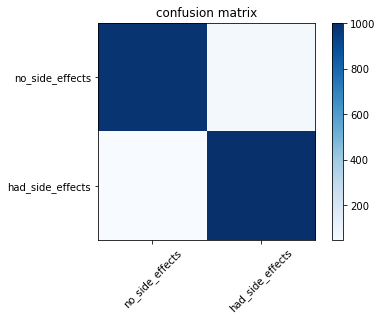

In [31]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

### save and load a model

In [32]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [34]:
import os
if os.path.isfile('models/medica_trial_model.h5') is False:
    model.save('models/medica_trial_model.h5')

In [35]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medica_trial_model.h5')

In [36]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [37]:
new_model.get_weights()

[array([[-0.28649947,  0.228091  ,  0.6743051 , -0.0958569 , -0.3068364 ,
          0.6985655 , -0.2482909 ,  0.13013907,  0.4753176 ,  0.6301557 ,
         -0.01394278,  0.5595298 , -0.36772168, -0.18100938, -0.31792212,
         -0.39783072]], dtype=float32),
 array([ 0.        , -0.0869446 , -0.14331026,  0.        ,  0.        ,
        -0.1657537 ,  0.        ,  0.25422066, -0.11972219, -0.14006464,
         0.        , -0.11818023,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.15137935e-01,  2.59797662e-01,  5.27700484e-02,
         -8.05299878e-02, -4.28997576e-02, -3.11736971e-01,
          4.80691493e-02,  1.98528171e-03, -8.97099078e-02,
         -2.14373171e-02,  3.69057953e-02, -2.28331819e-01,
         -1.84595108e-01, -1.48618296e-01,  6.58847094e-02,
          1.87122911e-01,  1.53117150e-01,  2.28577465e-01,
          3.20124894e-01, -1.37135223e-01, -2.57839501e-01,
         -2.98333943e-01, -2.82816827e-01,  2.44781822e-01,
 

In [38]:
new_model.optimizer

### model.to_json()

In [40]:
#save as JSON
json_string = model.to_json()

#save as yaml
# yaml_string = model.to_yaml()

In [41]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [42]:
# to save only model's architecture without weights and optimizers...
#model reconstruciton from json:

from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model reconstruciton from YAML:
# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(json_string)


In [43]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [48]:
# to save only model weights

import os
if os.path.isfile('models/medica_weights.h5') is False:
    model.save_weights('models/medica_weights.h5')

In [49]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [50]:
# to load weights to other model:

model2.load_weights('models/medica_weights.h5')

In [51]:
model2.get_weights()

[array([[-0.28649947,  0.228091  ,  0.6743051 , -0.0958569 , -0.3068364 ,
          0.6985655 , -0.2482909 ,  0.13013907,  0.4753176 ,  0.6301557 ,
         -0.01394278,  0.5595298 , -0.36772168, -0.18100938, -0.31792212,
         -0.39783072]], dtype=float32),
 array([ 0.        , -0.0869446 , -0.14331026,  0.        ,  0.        ,
        -0.1657537 ,  0.        ,  0.25422066, -0.11972219, -0.14006464,
         0.        , -0.11818023,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.15137935e-01,  2.59797662e-01,  5.27700484e-02,
         -8.05299878e-02, -4.28997576e-02, -3.11736971e-01,
          4.80691493e-02,  1.98528171e-03, -8.97099078e-02,
         -2.14373171e-02,  3.69057953e-02, -2.28331819e-01,
         -1.84595108e-01, -1.48618296e-01,  6.58847094e-02,
          1.87122911e-01,  1.53117150e-01,  2.28577465e-01,
          3.20124894e-01, -1.37135223e-01, -2.57839501e-01,
         -2.98333943e-01, -2.82816827e-01,  2.44781822e-01,
 

## CNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

for count, filename in enumerate(os.listdir("C:\\Users\\Rajesh\\DSp\\data\\cats vs dogs\\Cat\\")): 
    directory = "C:\\Users\\Rajesh\\DSp\\data\\cats vs dogs\\Cat\\" 
    os.rename(os.path.join(directory+filename), os.path.join(directory+"cat"+filename)) 

for count, filename in enumerate(os.listdir("C:\\Users\\Rajesh\\DSp\\data\\cats vs dogs\\Dog\\")): 
    directory = "C:\\Users\\Rajesh\\DSp\\data\\cats vs dogs\\Dog\\" 
    os.rename(os.path.join(directory+filename), os.path.join(directory+"dog"+filename)) '

import random
os.chdir("data/cats vs dogs")
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')    
    os.makedirs('train/cat')
    os.makedirs('test/cat')    
    os.makedirs('test/dog')    
    os.makedirs('valid/dog')    
    os.makedirs('valid/cat')  
    
    for c in random.sample(glob.glob('cat*'), 500):
        os.replace(c, 'train/cat/'+c)
    for c in random.sample(glob.glob('dog*'), 500):
        os.replace(c, 'train/dog/'+c)
    for c in random.sample(glob.glob('cat*'), 50):
        os.replace(c, 'test/cat/'+c)
    for c in random.sample(glob.glob('dog*'), 50):
        os.replace(c, 'test/dog/'+c)
    for c in random.sample(glob.glob('cat*'), 100):
        os.replace(c, 'valid/cat/'+c)
    for c in random.sample(glob.glob('dog*'), 100):
        os.replace(c, 'valid/dog/'+c)

os.chdir('../../')

In [2]:
train_path = 'data/cats vs dogs/train'
test_path = 'data/cats vs dogs/test'
valid_path = 'data/cats vs dogs/valid'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
        .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
        .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
        .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 1002 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [17]:
assert train_batches.n == 1002
assert test_batches.n == 100
assert valid_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [4]:
imgs, labels = next(train_batches)

In [5]:
def PlotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

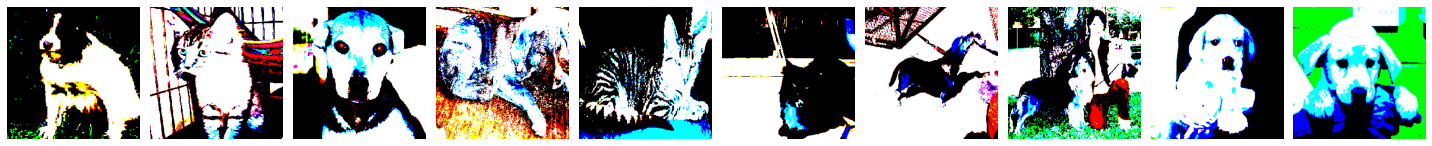

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
PlotImages(imgs)
print(labels)

### Mapping Keras Labels To Image Classes

In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

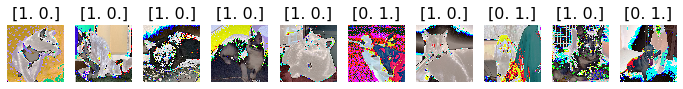

In [8]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

### build and train cnn

In [9]:
 model = Sequential([
         Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224,3)),
         MaxPool2D(pool_size=(2,2), strides=2),
         Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
         MaxPool2D(pool_size=(2,2), strides=2),
         Flatten(),
         Dense(units=2, activation='softmax'),
                ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
101/101 - 174s - loss: 18.9512 - accuracy: 0.5599 - val_loss: 8.4334 - val_accuracy: 0.6400
Epoch 2/10
101/101 - 72s - loss: 2.7905 - accuracy: 0.7345 - val_loss: 3.0985 - val_accuracy: 0.6200
Epoch 3/10
101/101 - 70s - loss: 0.5790 - accuracy: 0.8862 - val_loss: 2.7728 - val_accuracy: 0.6050
Epoch 4/10
101/101 - 71s - loss: 0.1343 - accuracy: 0.9541 - val_loss: 2.2184 - val_accuracy: 0.6550
Epoch 5/10
101/101 - 69s - loss: 0.0560 - accuracy: 0.9800 - val_loss: 2.4313 - val_accuracy: 0.6950
Epoch 6/10
101/101 - 69s - loss: 0.0093 - accuracy: 0.9980 - val_loss: 2.3221 - val_accuracy: 0.7150
Epoch 7/10
101/101 - 69s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.3234 - val_accuracy: 0.7100
Epoch 8/10
101/101 - 69s - loss: 7.1044e-04 - accuracy: 1.0000 - val_loss: 2.3221 - val_accuracy: 0.6850
Epoch 9/10
101/101 - 68s - loss: 5.3516e-04 - accuracy: 1.0000 - val_loss: 2.3152 - val_accuracy: 0.6900
Epoch 10/10
101/101 - 69s - loss: 4.7531e-04 - accuracy: 1.0000 - val_loss: 2.313

### predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

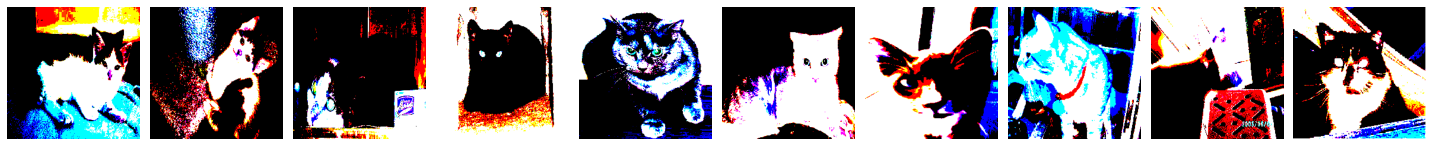

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [30]:
test_imgs, test_labels = next(test_batches)
PlotImages(test_imgs)
print(test_labels)

In [31]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
predictions = model.predict(x=test_batches, verbose=0)

In [33]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [34]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [29]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function plots and prints the confusionmatrix,
    Normalization can be applied by setting normalize=True
    """
    
    plt.imshow(cm, interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confuison matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    thrash = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thrash else "black") 
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label")

In [37]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[33 17]
 [16 34]]


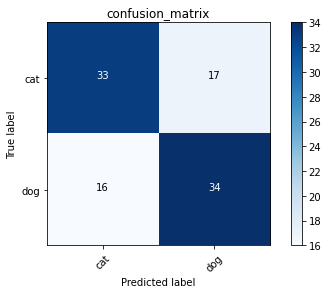

In [42]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

### Using a pretrained model for classifying : vgg16

In [10]:
 # download the model:
    
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [11]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list() for v in model.non_trainable_weights)])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return{'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [13]:
params = count_params(vgg16_model)
# assert params['non_trainable_params'] == 0
# assert params['trainable_params'] == 138357544

In [14]:
#converting vgg16 model into sequential model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [16]:
# to disable retraining vgg16 and freeze weights
for layer in model.layers:
    layer.trainable = False

In [17]:
# add our own output layer with two output classes
model.add(Dense(units=2, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Train the fine-tuned vgg16 model

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit():
-> object : the model to train.      
-> X : our training data. Can be Vector, array or matrix      
-> Y : our training labels. Can be Vector, array or matrix       
-> Batch_size : it can take any integer value or NULL and by default, it will
be set to 32. It specifies no. of samples per gradient.      
-> Epochs : an integer and number of epochs we want to train our model for.      
-> Verbose : specifies verbosity mode(0 = silent, 1= progress bar, 2 = one
line per epoch).      
-> Shuffle : whether we want to shuffle our training data before each epoch.      
-> steps_per_epoch : it specifies the total number of steps taken before
one epoch has finished and started the next epoch. By default it values is set to NULL.

In [20]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
101/101 - 804s - loss: 0.3017 - accuracy: 0.8733 - val_loss: 0.1468 - val_accuracy: 0.9450
Epoch 2/5
101/101 - 771s - loss: 0.0837 - accuracy: 0.9731 - val_loss: 0.1307 - val_accuracy: 0.9400
Epoch 3/5
101/101 - 770s - loss: 0.0538 - accuracy: 0.9860 - val_loss: 0.1014 - val_accuracy: 0.9450
Epoch 4/5
101/101 - 770s - loss: 0.0401 - accuracy: 0.9910 - val_loss: 0.0889 - val_accuracy: 0.9600
Epoch 5/5
101/101 - 771s - loss: 0.0307 - accuracy: 0.9920 - val_loss: 0.0977 - val_accuracy: 0.9500


### predict using test set

In [21]:
predictions = model.predict(x=test_batches, verbose=0)

In [62]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [64]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [26]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function plots and prints the confusionmatrix,
    Normalization can be applied by setting normalize=True
    """
    
    plt.imshow(cm, interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confuison matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    thrash = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thrash else "black") 
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label")

Confusion matrix without normalization
[[48  2]
 [ 3 47]]


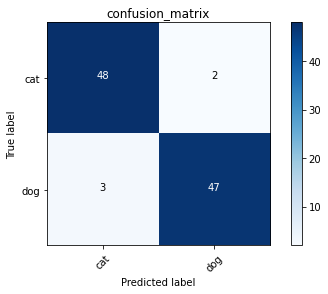

In [27]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

In [28]:
os.getcwd()

'C:\\Users\\Rajesh\\DSp'

In [29]:
import os
if os.path.isfile('models/vgg16_cats_vs_dogs.h5') is False:
    model.save('models/vgg16_cats_vs_dogs.h5')

### MobileNet

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [10]:
def prepare_image(file):
    img_path = "data/images/"
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

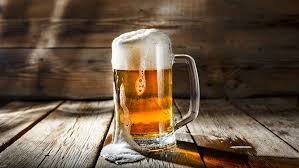

In [8]:
from IPython.display import Image
Image(filename="data/images/1.jpg", width=300, height=200)

In [13]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02823750', 'beer_glass', 0.97065365),
  ('n03937543', 'pill_bottle', 0.016248103),
  ('n02815834', 'beaker', 0.0053646876),
  ('n04560804', 'water_jug', 0.002538581),
  ('n04579145', 'whiskey_jug', 0.0010591781)]]

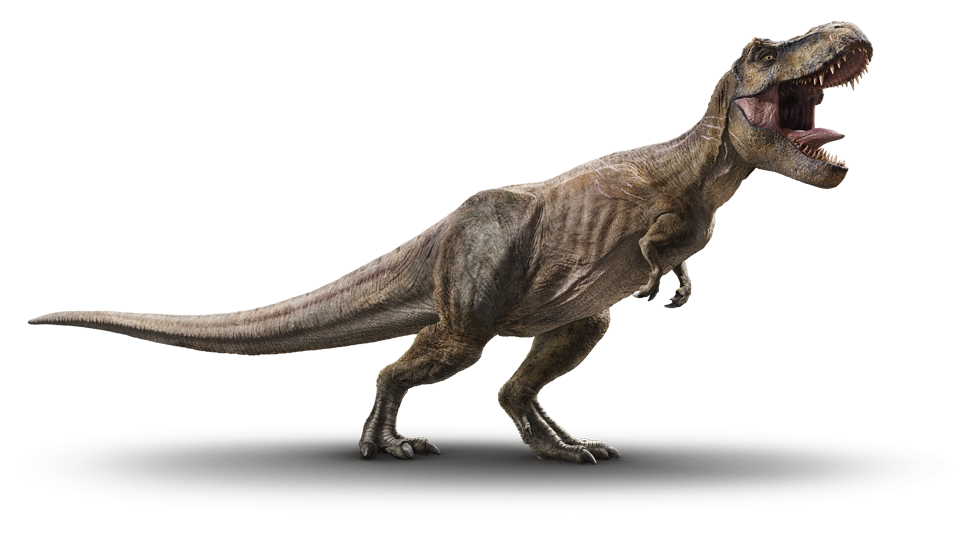

In [14]:
from IPython.display import Image
Image(filename="data/images/2.png", width=300, height=200)

In [15]:
preprocessed_image = prepare_image('2.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01688243', 'frilled_lizard', 0.8493348),
  ('n01687978', 'agama', 0.037137236),
  ('n01704323', 'triceratops', 0.013734425),
  ('n01675722', 'banded_gecko', 0.012436925),
  ('n01694178', 'African_chameleon', 0.011955423)]]

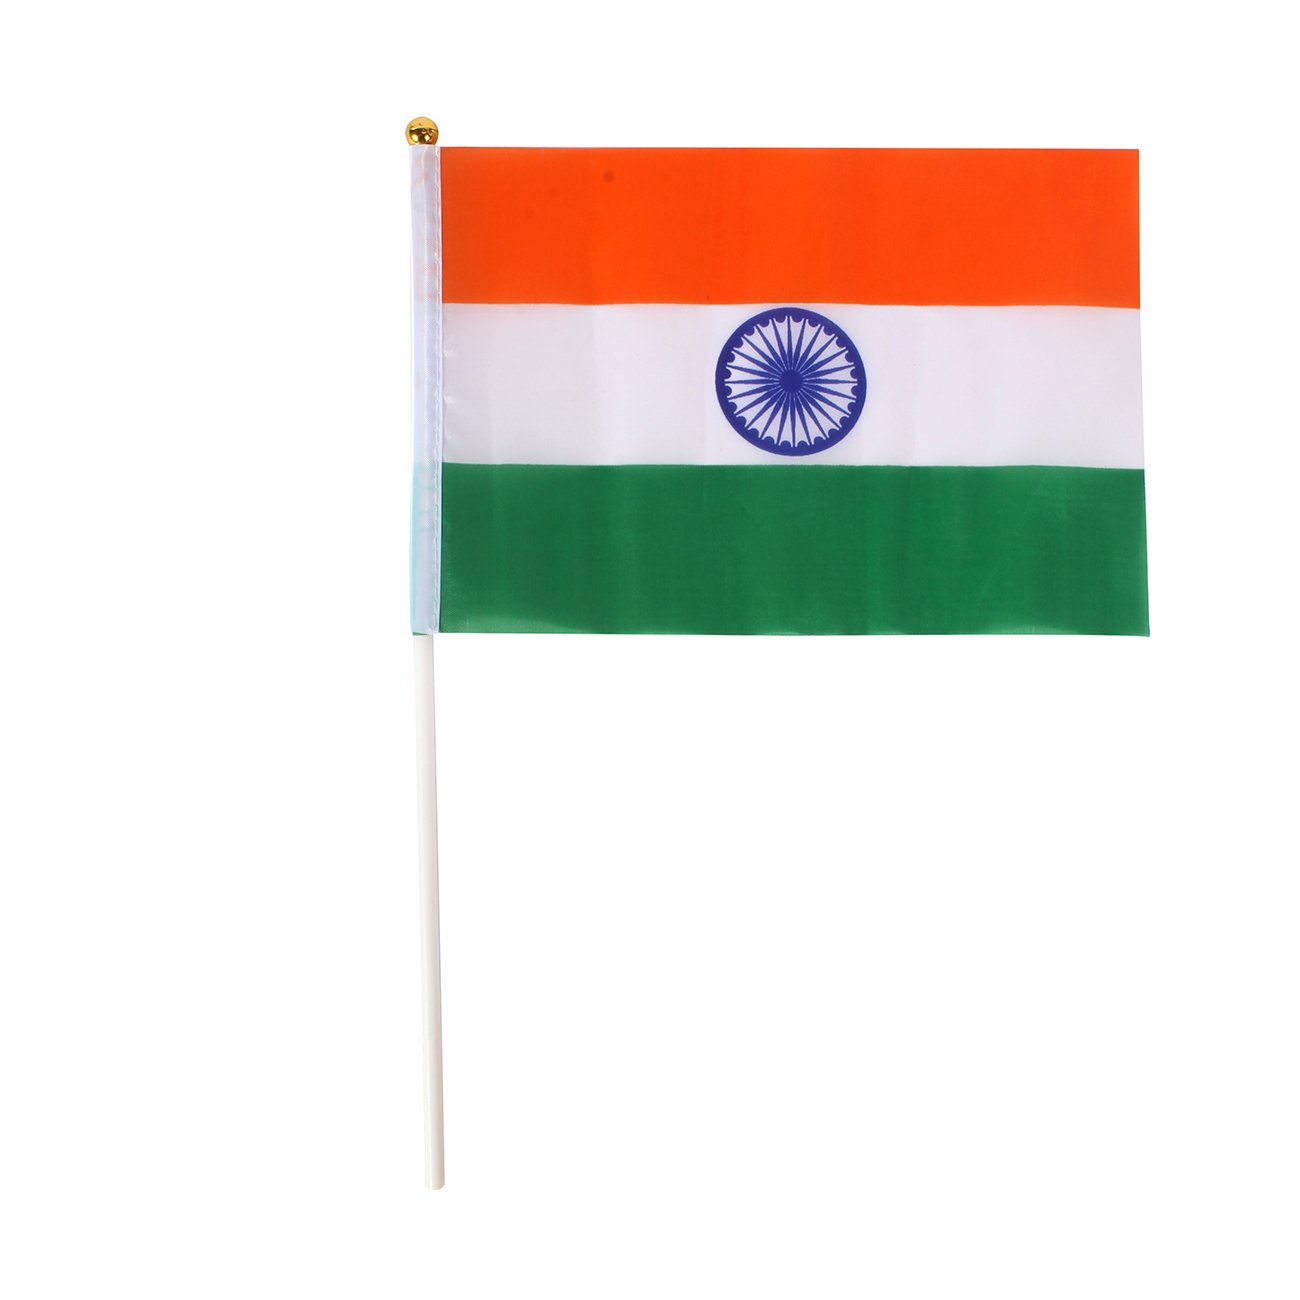

In [16]:
from IPython.display import Image
Image(filename="data/images/3.jpg", width=300, height=200)

In [17]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03355925', 'flagpole', 0.36754498),
  ('n03944341', 'pinwheel', 0.097528204),
  ('n04550184', 'wardrobe', 0.061321847),
  ('n03291819', 'envelope', 0.055493638),
  ('n04548362', 'wallet', 0.044102516)]]

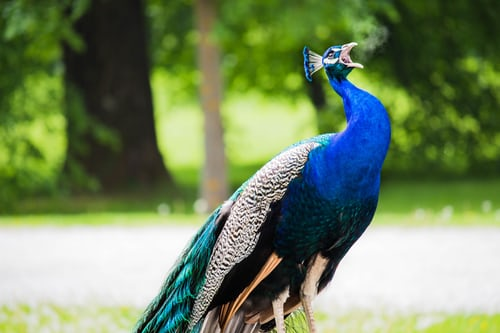

In [18]:
from IPython.display import Image
Image(filename="data/images/4.jpg", width=300, height=200)

In [19]:
preprocessed_image = prepare_image('4.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01806143', 'peacock', 0.99998283),
  ('n02017213', 'European_gallinule', 1.4254979e-05),
  ('n01514668', 'cock', 1.4925753e-06),
  ('n01616318', 'vulture', 4.0766813e-07),
  ('n02002724', 'black_stork', 3.1292552e-07)]]

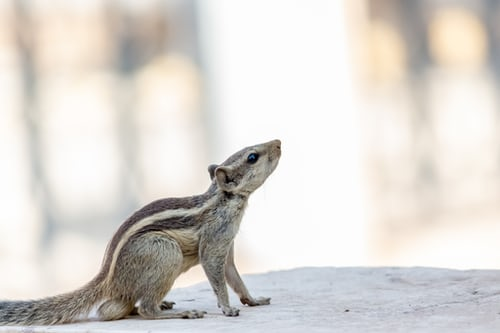

In [20]:
from IPython.display import Image
Image(filename="data/images/5.jpg", width=300, height=200)

In [21]:
preprocessed_image = prepare_image('5.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01687978', 'agama', 0.41759974),
  ('n01689811', 'alligator_lizard', 0.3490764),
  ('n01630670', 'common_newt', 0.06837208),
  ('n01688243', 'frilled_lizard', 0.03873071),
  ('n01685808', 'whiptail', 0.033665486)]]

### Process Images For Fine-Tuned MobileNet

In [2]:
# Organize data into train, valid, test dirs
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [3]:
 train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [5]:
x = mobile.layers[-6].output

In [6]:
output = Dense(units=10, activation='softmax')(x)

In [7]:
model = Model(inputs=mobile.input, outputs=output)

In [8]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

### Train the model

In [10]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
172/172 - 215s - loss: 0.6591 - accuracy: 0.8067 - val_loss: 0.2502 - val_accuracy: 0.9300
Epoch 2/30
172/172 - 165s - loss: 0.1249 - accuracy: 0.9801 - val_loss: 0.1205 - val_accuracy: 0.9633
Epoch 3/30
172/172 - 166s - loss: 0.0585 - accuracy: 0.9953 - val_loss: 0.0953 - val_accuracy: 0.9667
Epoch 4/30
172/172 - 168s - loss: 0.0367 - accuracy: 0.9971 - val_loss: 0.0814 - val_accuracy: 0.9700
Epoch 5/30
172/172 - 170s - loss: 0.0255 - accuracy: 0.9988 - val_loss: 0.0804 - val_accuracy: 0.9700
Epoch 6/30
172/172 - 164s - loss: 0.0191 - accuracy: 0.9982 - val_loss: 0.0750 - val_accuracy: 0.9800
Epoch 7/30
172/172 - 163s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9767
Epoch 8/30
172/172 - 161s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9800
Epoch 9/30
172/172 - 168s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9833
Epoch 10/30
172/172 - 163s - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.0656 - 

### Predict

In [12]:
test_labels = test_batches.classes

In [13]:
predictions = model.predict(x=test_batches, verbose=0)

In [14]:
test_batches.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [15]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [16]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [18]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function plots and prints the confusionmatrix,
    Normalization can be applied by setting normalize=True
    """
    
    plt.imshow(cm, interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confuison matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    thrash = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thrash else "black") 
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label")

Confusion matrix without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


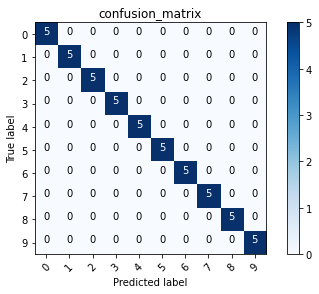

In [20]:
cm_plot_labels = ['0', '1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

### Data Augmentation

In [1]:
 import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
#for Augmenting the data:

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [5]:
chosen_image = random.choice(os.listdir('data/cats vs dogs/train/dog'))

In [7]:
chosen_image

'dog125.jpg'

In [10]:
image_path = 'data/cats vs dogs/train/dog/' + chosen_image

In [11]:
image = np.expand_dims(plt.imread(image_path),0)

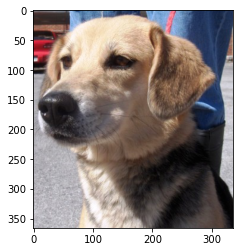

In [12]:
plt.imshow(image[0])

In [13]:
aug_iter = gen.flow(image)

In [14]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

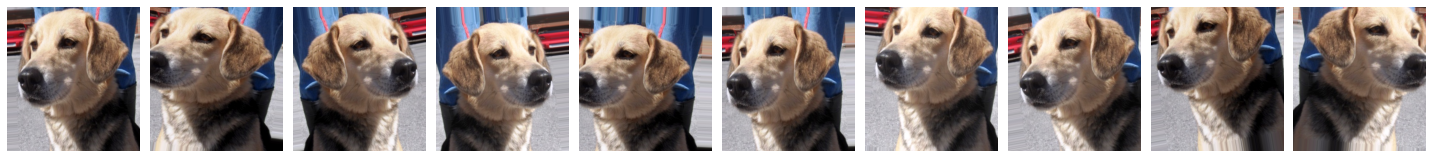

In [15]:
plotImages(aug_images)

In [17]:
aug_iter = gen.flow(image, save_to_dir='data/cats vs dogs/train/dog', save_prefix='aug-image-', save_format='jpeg')

## Deploy Keras Neural Network To Flask Web Service 

In [10]:
%%writefile sample_app.py

from flask import Flask

app = Flask(__name__)

@app.route('/sample')

def running():
    return 'Flask is running!'

if __name__ == "__main__":
    app.run()

Overwriting sample_app.py


cmd:
python sample_app.py

browse:
http://localhost:5000/sample

In [15]:
import os
# os.chdir('Flask_app')
os.getcwd()

'C:\\Users\\Rajesh\\DSp\\Flask_app'

In [17]:
%%writefile hello_app.py


from flask import request
from flask import jsonify
from flask import Flask

app = Flask(__name__)

@app.route('/hello',methods=['POST'])
def hello():
    message = request.get_json(force=True)
    name = message['name']
    response = {
        'greeting': 'Hello, ' + name + '!'
    }
    return jsonify(response)

if __name__ == "__main__":
    app.run()

Overwriting hello_app.py


In [18]:
os.chdir('static')

In [22]:
%%writefile hello.html

<head>
<title>deeplizard greeting app</title>
<style>
    * {
        font-size:30px;
    }
</style>
</head>

<body>
<input id="name-input" type="text"/>
<button id="name-button">Submit Name</button>
<p id="greeting">1</p>

<script src="https://code.jquery.com/jquery-3.3.1.min.js"></script>
<script>
    $("#name-button").click(function(event){
        let message = {
            name: $("#name-input").val()
        }
        $.post("http://localhost:5000/hello", JSON.stringify(message), function(response){
            $("#greeting").text(response.greeting);
            console.log(response);
        });
    });
</script>
</body>
</html>

Overwriting hello.html


cmd:
    python hello.py

    browse:
        http://localhost:5000/static/hello.html

In [5]:
import os
os.chdir("C:\\Users\\Rajesh\\DSp\\Flask_app")
os.getcwd()

'C:\\Users\\Rajesh\\DSp\\Flask_app'

In [8]:
import numpy
numpy.__version__

'1.19.4'

In [27]:
%%writefile predict.py

import base64
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask

app = Flask(__name__)

def get_model():
    global model
    model = load_model('vgg16_cats_vs_dogs.h5')
    print(" * Model loaded!")

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

print(" * Loading Keras model...")
get_model()

@app.route("/predict", methods=["POST"])
def predict():
    message = request.get_json(force=True)
    encoded = message['image']
    decoded = base64.b64decode(encoded)
    image = Image.open(io.BytesIO(decoded))
    processed_image = preprocess_image(image, target_size=(224, 224))

    prediction = model.predict(processed_image).tolist()

    response = {
        'prediction': {
            'dog': prediction[0][0],
            'cat': prediction[0][1]
        }
    }
    return jsonify(response)

if __name__=="__main__":
    app.run()


Overwriting predict.py


In [7]:
import os
# os.getcwd()
os.chdir("Flask_app/static")

In [15]:
%%writefile predict.html

<!DOCTYPE html>
<html>
<head>
    <title>deeplizard predict image app</title>
    <style>
        * {
            font-size:30px;
        }
    </style>
</head>

<body>    
    <input id="image-selector" type="file">    
    <button id="predict-button">Predict</button>
    <p style="font-weight:bold">Predictions</p>    
    <p>Dog: <span id="dog-prediction"></span></p>
    <p>Cat: <span id="cat-prediction"></span></p>
    <img id="selected-image" src=""/>
    ...
    ...
    
<script src="https://code.jquery.com/jquery-3.3.1.min.js"></script>
<script>
    let base64Image;
    $("#image-selector").change(function() {
        let reader = new FileReader();
        reader.onload = function(e) {
            let dataURL = reader.result;
            $('#selected-image').attr("src", dataURL);
            base64Image = dataURL.replace("data:image/png;base64,","");
            console.log(base64Image);
        }
        reader.readAsDataURL($("#image-selector")[0].files[0]);
        $("#dog-prediction").text("");
        $("#cat-prediction").text("");
    });

    $("#predict-button").click(function(){
        let message = {
            image: base64Image
        }
        console.log(message);
        $.post("http://127.0.0.1:5000/predict", JSON.stringify(message), function(response){
            $("#dog-prediction").text(response.prediction.dog.toFixed(6));
            $("#cat-prediction").text(response.prediction.cat.toFixed(6));
            console.log(response);
        });
    });       
</script> # No prediction result.........................

Overwriting predict.html


In [1]:
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask

def get_model():
    global model
    model = load_model('vgg16_cats_vs_dogs.h5')
    print(" * Model loaded!")

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

print(" * Loading Keras model...")
get_model()

image = Image.open(r"C:\Users\Rajesh\DSp\data\cats vs dogs\train\dog\dog1.jpg")
# encoded = message['image']
# decoded = base64.b64decode(encoded)
# image = Image.open(io.BytesIO(decoded))
processed_image = preprocess_image(image, target_size=(224, 224))

prediction = model.predict(processed_image).tolist()

response = {
    'prediction': {
        'dog': prediction[0][0],
        'cat': prediction[0][1]
    }
}
print(response)

 * Loading Keras model...
 * Model loaded!
{'prediction': {'dog': 0.0008465479477308691, 'cat': 0.9991534948348999}}


In [21]:
os.getcwd()

'C:\\Users\\Rajesh\\DSp\\Flask_app\\static'

In [24]:
%%writefile predict_with_visuals.html

<head>
    <title>predict image app</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/dc/3.0.4/dc.css">
    <style>
        * { font-size:30px; }
    </style>
</head>

<body>
    <input id="image-selector" type="file">
    <button id="predict-button">Predict</button>
    <div>
        <div id="row-chart"></div>
        <div id="pie-chart"></div>
    </div>
    <img id="selected-image" style="clear:both;display:block;"  src=""/>
    ...

</body>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/crossfilter/1.3.12/crossfilter.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/dc/3.0.3/dc.min.js"></script>

$("#image-selector").change(function() {
    ...
    
    reader.readAsDataURL($("#image-selector")[0].files[0]);
    $("#row-chart").empty();
    $("#pie-chart").empty();
});

$("#predict-button").click(function(){
    let message = {
        image: base64Image
    }
    console.log(message);
    $.post("http://10.0.0.4:5000/predict", JSON.stringify(message), function(response){

        let predictions = Object.entries(response.prediction).map(function(entry) {
            return {
                category: entry[0],
                value: entry[1]
            };
        });

        console.log("response.prediction originally looks like this:")
        console.log(response.prediction)
        console.log("response.prediction is then transformed to the predictions object, " +
                    "which looks like this:")
        console.log(predictions)

        let cf = crossfilter(predictions);
        let category = cf.dimension(p => p.category);

        dc.rowChart("#row-chart")
            .dimension(category)
            .group(category.group().reduceSum(p => p.value))

        dc.pieChart("#pie-chart")
            .dimension(category)
            .group(category.group().reduceSum(p => p.value))

        dc.renderAll();
    });
});




Overwriting predict_with_visuals.html
